# Exploratory Data Analysis - Online News Popularity 

In [1]:
import math
import numpy as np
import pandas as pd
from numpy import arange
from matplotlib import pyplot 
from pandas import read_csv
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

from sklearn.ensemble import RandomForestRegressor

import seaborn as sns
plt.style.use('seaborn-whitegrid')
import warnings
warnings.filterwarnings("ignore")

#### Reading data

In [2]:
#[kannan: directly reading the data, later change the pipeline to preprocessed, feature engineered data]
# inputFile = 'OnlineNewsPopularity.csv' 
# df = read_csv(inputFile)
inputFile = '../data/input/OnlineNewsPopularity.xlsx'
df = pd.read_excel(inputFile)
df.columns = df.columns.str.replace(' ','')
print(df.shape)
df.head()

(7795, 20)


,Id,url,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,shares
0,1,http://mashable.com/2014/09/01/americans-held-...,10,261,0.661355,1.0,0.787500,7,3,1,1,4.873563,7,0,0,0,0,0,1,1100
1,2,http://mashable.com/2014/09/01/apple-visa-mast...,7,1791,0.370242,1.0,0.535038,74,3,50,0,4.554439,8,0,0,0,0,0,0,1100
2,3,http://mashable.com/2014/09/01/aussie-football...,7,503,0.524291,1.0,0.704918,3,3,1,0,5.003976,5,0,0,0,0,0,1,1000
3,4,http://mashable.com/2014/09/01/australia-gover...,10,526,0.536204,1.0,0.654867,17,1,1,0,4.998099,9,0,0,0,0,0,1,822
4,5,http://mashable.com/2014/09/01/australia-jane-...,13,237,0.619048,1.0,0.807143,5,3,1,0,5.046414,9,0,0,0,0,0,1,841


In [3]:
# Dropping useless attributes
df.drop('url', axis=1, inplace=True)
df.drop('Id', axis=1, inplace=True)

In [4]:
# variables for total columns, total input attributes, target column index and renaming target variable
totCol = len(df.columns)
totAttr = totCol-1
targetCol = totCol #last column
df.rename(columns={'shares': 'targetVar'}, inplace=True)

In [5]:
# Set up the number of row and columns for visualization display. dispRow * dispCol should be >= totAttr
dispCol = 3
if totAttr % dispCol == 0 :
    dispRow = totAttr // dispCol
else :
    dispRow = (totAttr // dispCol) + 1
    
# Set figure width to 16 and height to 12 (4:3 aspect ratio)
fig_size = pyplot.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 12
pyplot.rcParams["figure.figsize"] = fig_size

### Descriptive statistics

In [6]:
df.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,targetVar
0,10,261,0.661355,1.0,0.787500,7,3,1,1,4.873563,7,0,0,0,0,0,1,1100
1,7,1791,0.370242,1.0,0.535038,74,3,50,0,4.554439,8,0,0,0,0,0,0,1100
2,7,503,0.524291,1.0,0.704918,3,3,1,0,5.003976,5,0,0,0,0,0,1,1000
3,10,526,0.536204,1.0,0.654867,17,1,1,0,4.998099,9,0,0,0,0,0,1,822
4,13,237,0.619048,1.0,0.807143,5,3,1,0,5.046414,9,0,0,0,0,0,1,841


In [7]:
#Shape
df.shape

(7795, 18)

In [8]:
#Data types
df.dtypes

n_tokens_title                     int64
n_tokens_content                   int64
n_unique_tokens                  float64
n_non_stop_words                 float64
n_non_stop_unique_tokens         float64
num_hrefs                          int64
num_self_hrefs                     int64
num_imgs                           int64
num_videos                         int64
average_token_length             float64
num_keywords                       int64
data_channel_is_lifestyle          int64
data_channel_is_entertainment      int64
data_channel_is_bus                int64
data_channel_is_socmed             int64
data_channel_is_tech               int64
data_channel_is_world              int64
targetVar                          int64
dtype: object

In [9]:
#Statistical summary
df.describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,targetVar
count,7795.000000,7795.000000,7795.000000,7795.00000,7795.000000,7795.000000,7795.000000,7795.000000,7795.000000,7795.000000,7795.000000,7795.000000,7795.000000,7795.000000,7795.000000,7795.000000,7795.000000,7795.000000
mean,11.134830,552.592303,0.482269,0.90789,0.621471,9.934573,2.717383,3.769596,1.199615,4.264341,6.948428,0.035792,0.197049,0.121360,0.026555,0.139705,0.319179,3028.541629
std,2.174198,467.271242,0.176853,0.28920,0.216238,11.621758,3.398486,6.857808,3.731758,1.386453,1.869191,0.185784,0.397795,0.326566,0.160791,0.346703,0.466188,8195.667753
min,3.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,10.000000,255.000000,0.447916,1.00000,0.609358,3.000000,1.000000,1.000000,0.000000,4.429090,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,900.500000
50%,11.000000,434.000000,0.516049,1.00000,0.673184,7.000000,2.000000,1.000000,0.000000,4.661270,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1300.000000
75%,13.000000,752.500000,0.582146,1.00000,0.733208,13.000000,4.000000,3.000000,1.000000,4.862137,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2400.000000
max,23.000000,7002.000000,1.000000,1.00000,1.000000,304.000000,116.000000,100.000000,50.000000,8.041534,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,284700.000000


In [10]:
#Missing values
df.isnull().sum()

n_tokens_title                   0
n_tokens_content                 0
n_unique_tokens                  0
n_non_stop_words                 0
n_non_stop_unique_tokens         0
num_hrefs                        0
num_self_hrefs                   0
num_imgs                         0
num_videos                       0
average_token_length             0
num_keywords                     0
data_channel_is_lifestyle        0
data_channel_is_entertainment    0
data_channel_is_bus              0
data_channel_is_socmed           0
data_channel_is_tech             0
data_channel_is_world            0
targetVar                        0
dtype: int64

### Data visualizations

##### Univariate plots

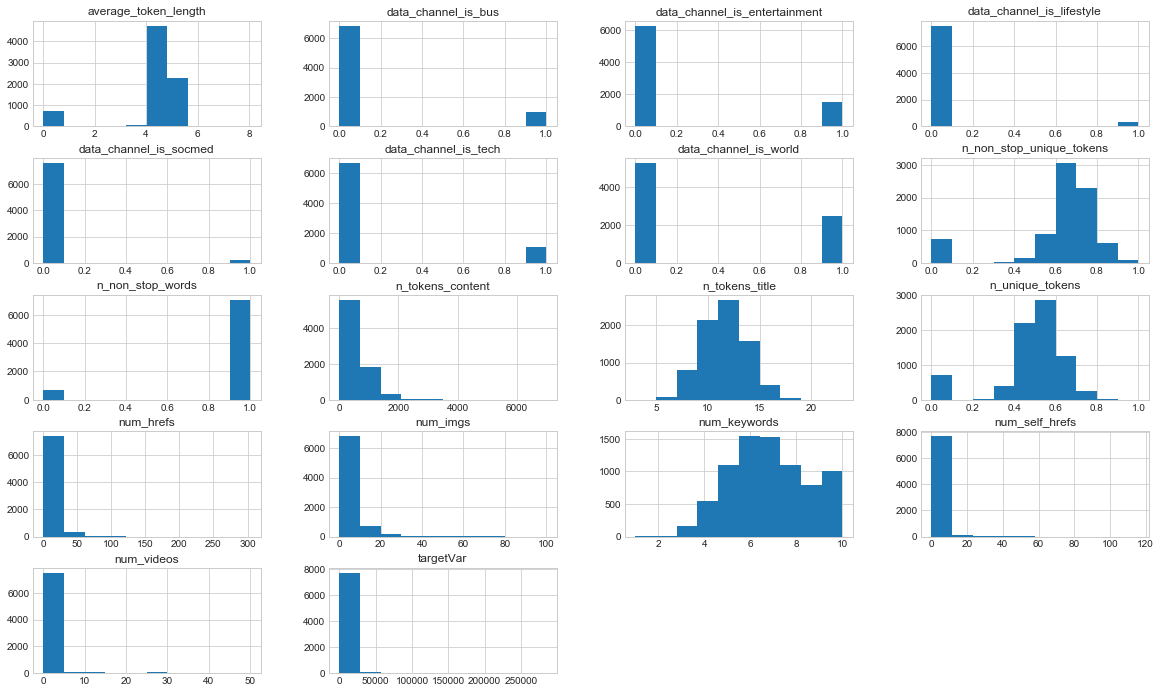

In [11]:
# Histograms for each attribute
df.hist()
pyplot.show()

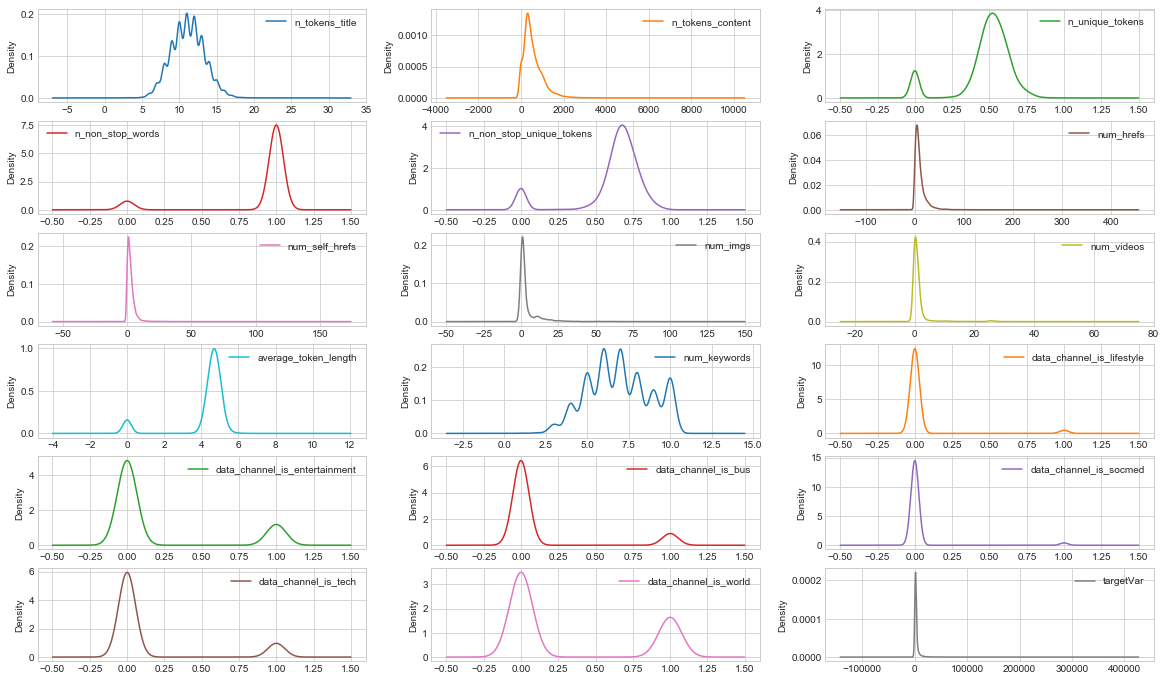

In [12]:
# Density plot for each attribute
df.plot(kind='density', subplots=True, layout=(dispRow,dispCol), sharex=False, sharey=False)
pyplot.show()

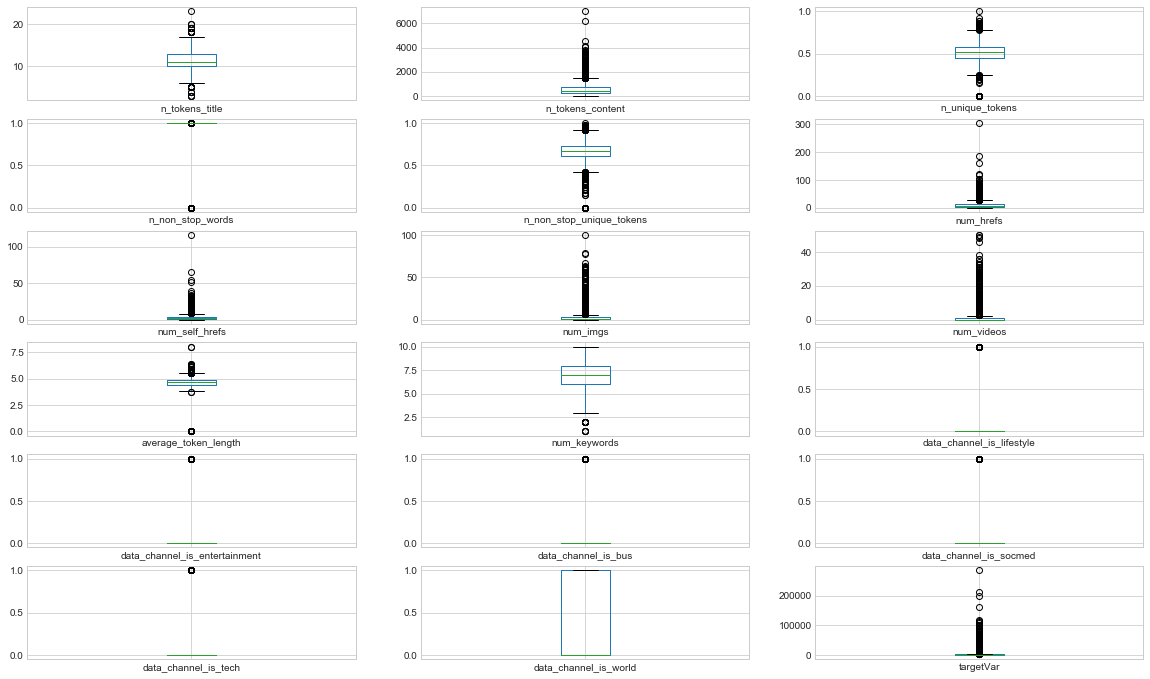

In [13]:
# Box and Whisker plot for each attribute
df.plot(kind='box', subplots=True, layout=(dispRow,dispCol), sharex=False, sharey=False)
pyplot.show()

#### 2.b.ii) Multivariate plots to better understand the relationships between attributes

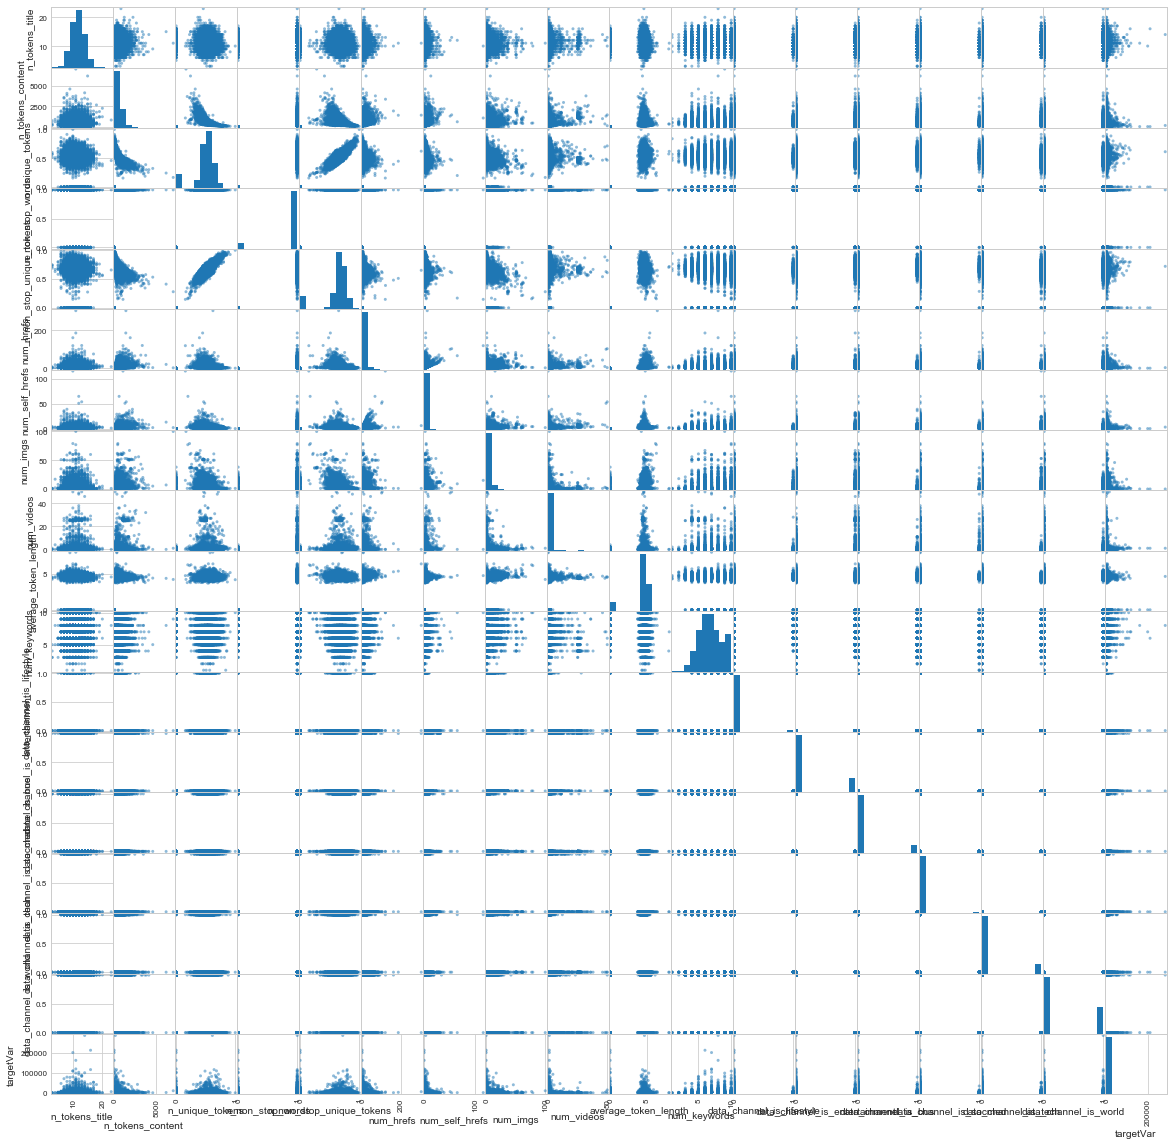

In [14]:
# Scatterplot matrix
# Set figure width to 16 and height to 12 (4:3 aspect ratio)
fig_size = pyplot.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 20
pyplot.rcParams["figure.figsize"] = fig_size

scatter_matrix(df)
pyplot.show()

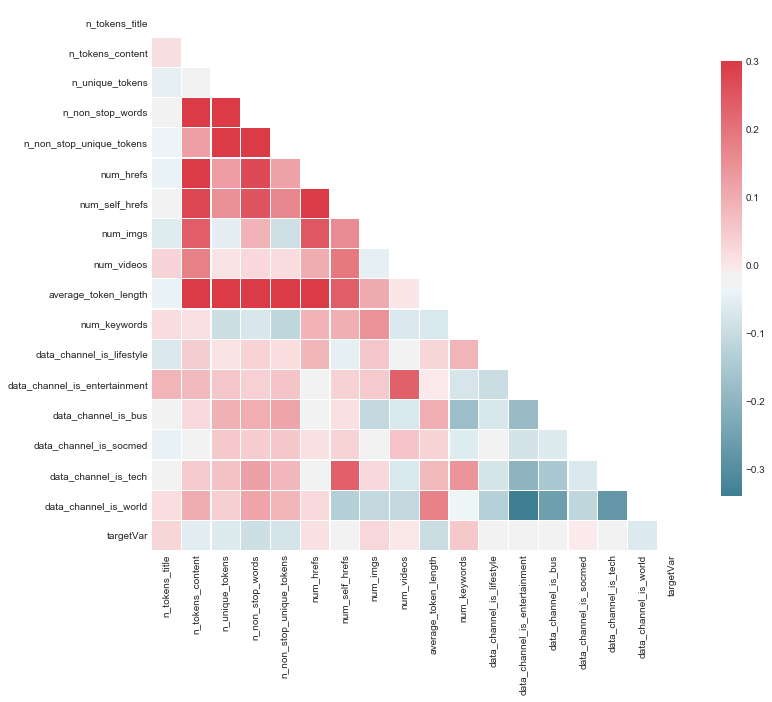

In [15]:
# Correlation matrix
corr_matrix = df.corr()
# Mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=np.bool))
# Set up the matplotlib figure
plt.figure(figsize = (12,10))
# Colormap
color_map = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=color_map, vmax=.3, linewidths=.2, cbar_kws={"shrink": .8})

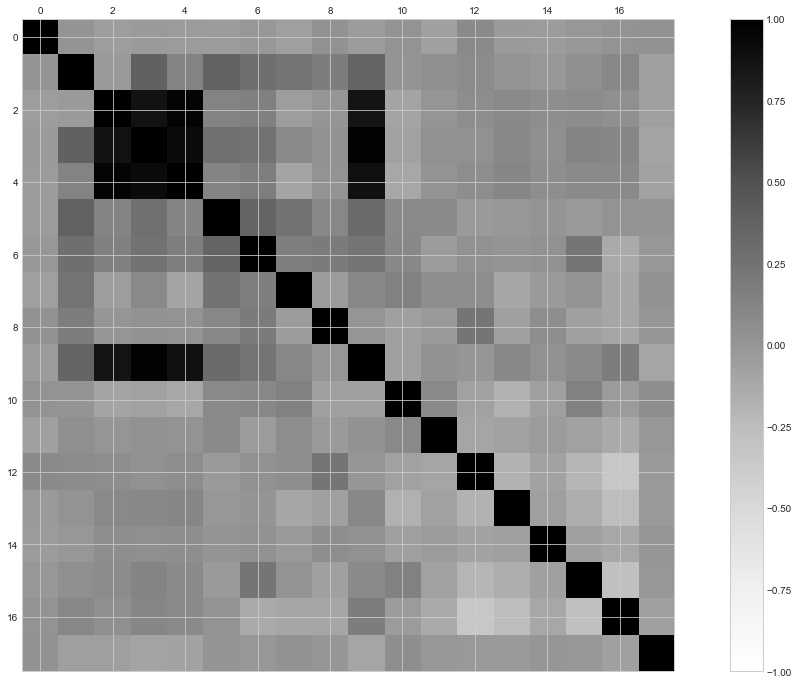

In [16]:
# Correlation matrix
fig_size = pyplot.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 12
pyplot.rcParams["figure.figsize"] = fig_size
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(df.corr(), vmin=-1, vmax=1)
fig.colorbar(cax)
pyplot.show()

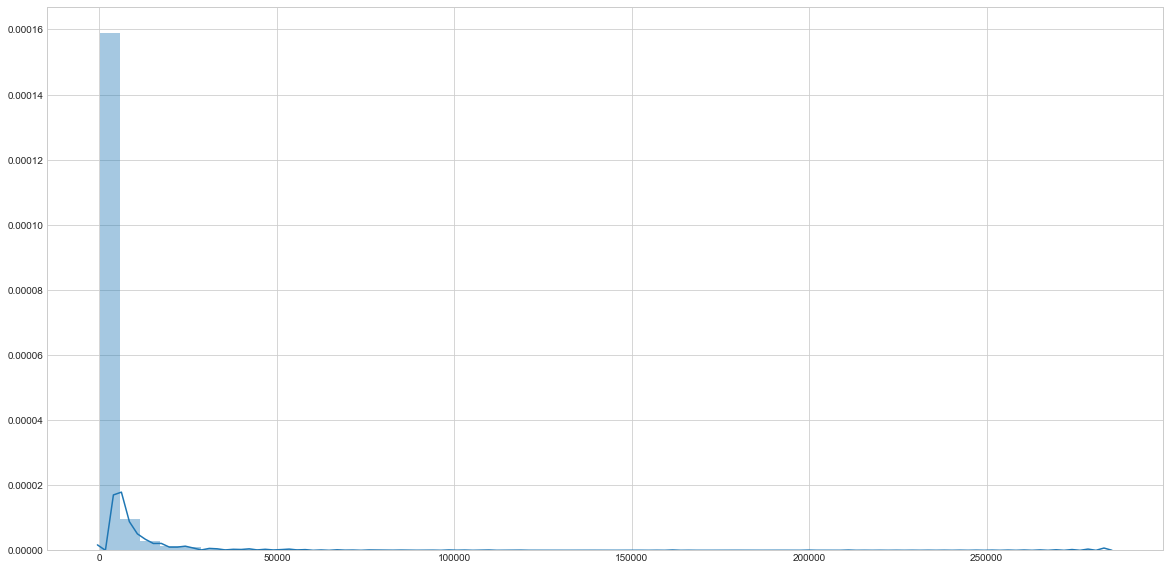

In [17]:
fig_size = pyplot.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
pyplot.rcParams["figure.figsize"] = fig_size

import matplotlib.pyplot as plt
import seaborn as sns, numpy as np
ax = sns.distplot(df[['targetVar']])
plt.show()

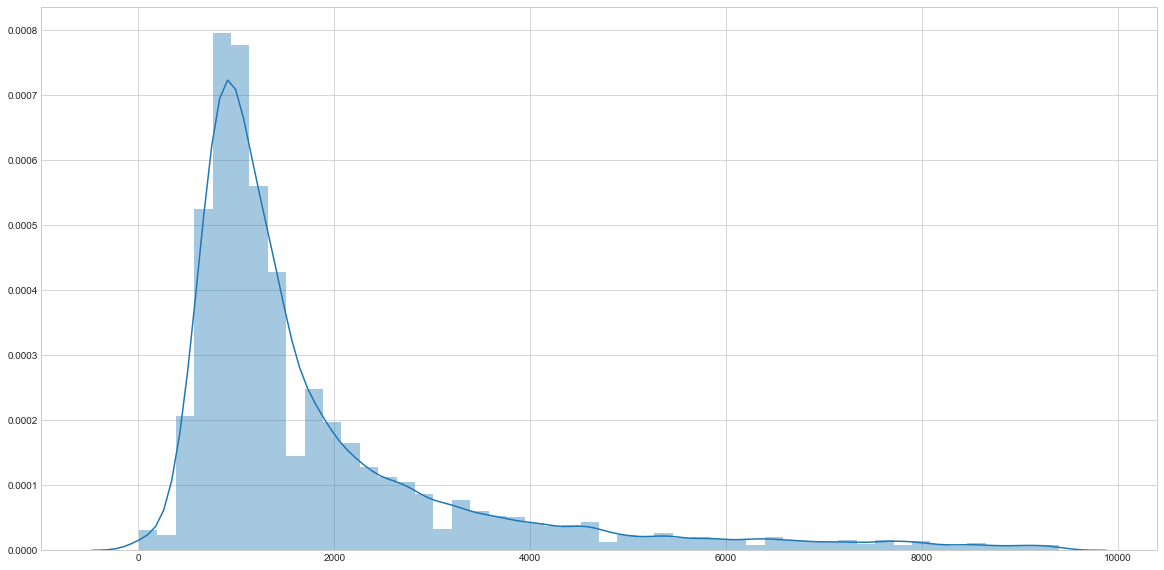

In [31]:
ax = sns.distplot(df[df.targetVar<9500][['targetVar']])
plt.show()

In [19]:
df_train = df.iloc[:,0:17]
df_test = df.iloc[:,17:18]

In [20]:
df_train.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world
0,10,261,0.661355,1.0,0.787500,7,3,1,1,4.873563,7,0,0,0,0,0,1
1,7,1791,0.370242,1.0,0.535038,74,3,50,0,4.554439,8,0,0,0,0,0,0
2,7,503,0.524291,1.0,0.704918,3,3,1,0,5.003976,5,0,0,0,0,0,1
3,10,526,0.536204,1.0,0.654867,17,1,1,0,4.998099,9,0,0,0,0,0,1
4,13,237,0.619048,1.0,0.807143,5,3,1,0,5.046414,9,0,0,0,0,0,1


In [21]:
df_test.head()

,targetVar
0,1100
1,1100
2,1000
3,822
4,841


In [22]:
rf_reg = RandomForestRegressor()
rf_reg.fit(df_train.values, df_test.values)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

Text(0, 0.5, 'Feature Importance Score')

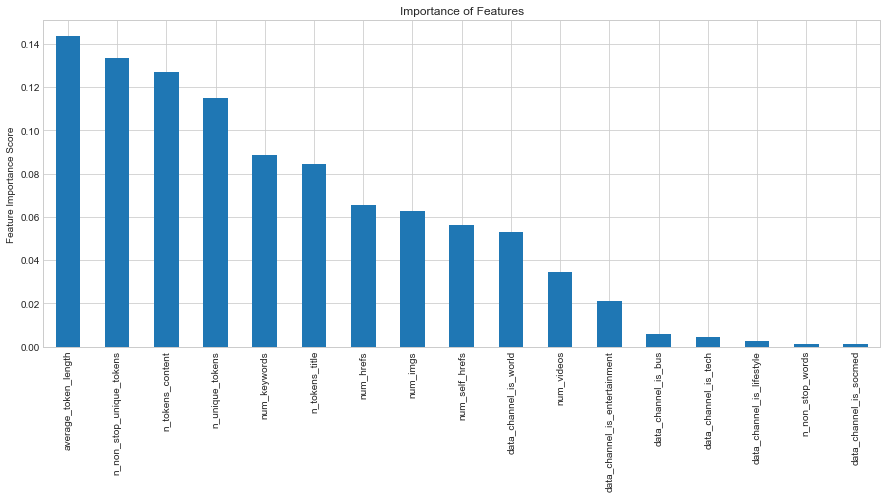

In [23]:
features = df_train.columns

plt.figure(figsize=(12,15))
feat_imp = pd.Series(rf_reg.feature_importances_, features).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features',width=0.5, figsize=(15,6))
plt.ylabel('Feature Importance Score')

In [24]:
#Outlier detection using IQR
import numpy as np

def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))


def outliers_iqr_limits(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return lower_bound, upper_bound

print(outliers_iqr_limits(df['targetVar']))

(-1348.75, 4649.25)


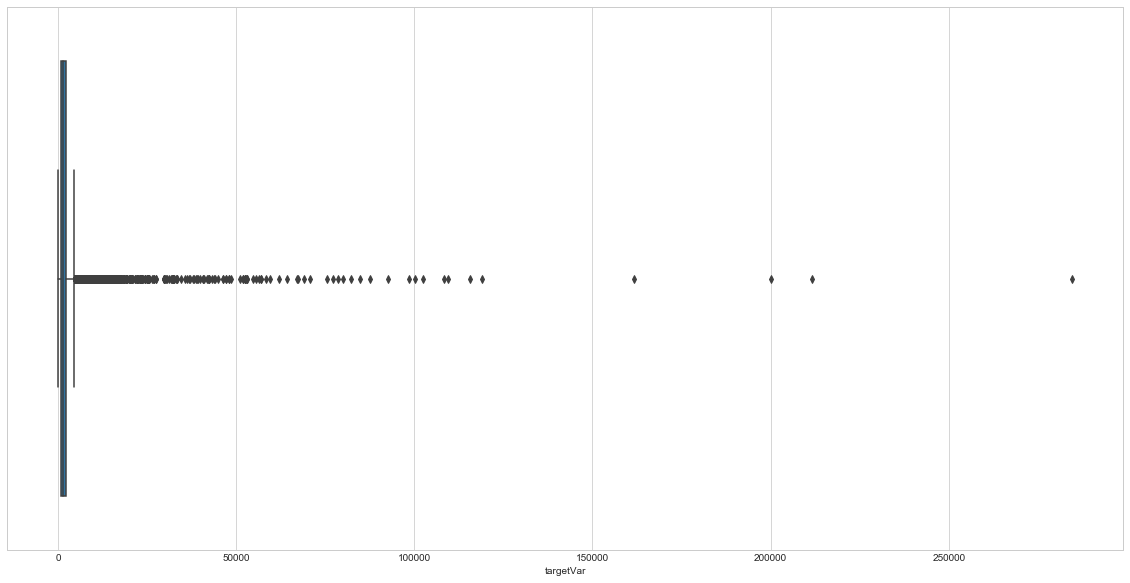

In [25]:
import seaborn as sns
sns.boxplot(x=df['targetVar'])

In [26]:
def annotate_boxplot(bpdict, annotate_params=None,
                     x_offset=0.05, x_loc=0,
                     text_offset_x=35,
                     text_offset_y=20):
    """Annotates a matplotlib boxplot with labels marking various centile levels.

    Parameters:
    - bpdict: The dict returned from the matplotlib `boxplot` function. If you're using pandas you can
    get this dict by setting `return_type='dict'` when calling `df.boxplot()`.
    - annotate_params: Extra parameters for the plt.annotate function. The default setting uses standard arrows
    and offsets the text based on other parameters passed to the function
    - x_offset: The offset from the centre of the boxplot to place the heads of the arrows, in x axis
    units (normally just 0-n for n boxplots). Values between around -0.15 and 0.15 seem to work well
    - x_loc: The x axis location of the boxplot to annotate. Usually just the number of the boxplot, counting
    from the left and starting at zero.
    text_offset_x: The x offset from the arrow head location to place the associated text, in 'figure points' units
    text_offset_y: The y offset from the arrow head location to place the associated text, in 'figure points' units
    """
    if annotate_params is None:
        annotate_params = dict(xytext=(text_offset_x, text_offset_y), textcoords='offset points', arrowprops={'arrowstyle':'->'})

    plt.annotate('Median', (x_loc + 1 + x_offset, bpdict['medians'][x_loc].get_ydata()[0]), **annotate_params)
    plt.annotate('25%', (x_loc + 1 + x_offset, bpdict['boxes'][x_loc].get_ydata()[0]), **annotate_params)
    plt.annotate('75%', (x_loc + 1 + x_offset, bpdict['boxes'][x_loc].get_ydata()[2]), **annotate_params)
    plt.annotate('5%', (x_loc + 1 + x_offset, bpdict['caps'][x_loc*2].get_ydata()[0]), **annotate_params)
    plt.annotate('95%', (x_loc + 1 + x_offset, bpdict['caps'][(x_loc*2)+1].get_ydata()[0]), **annotate_params)

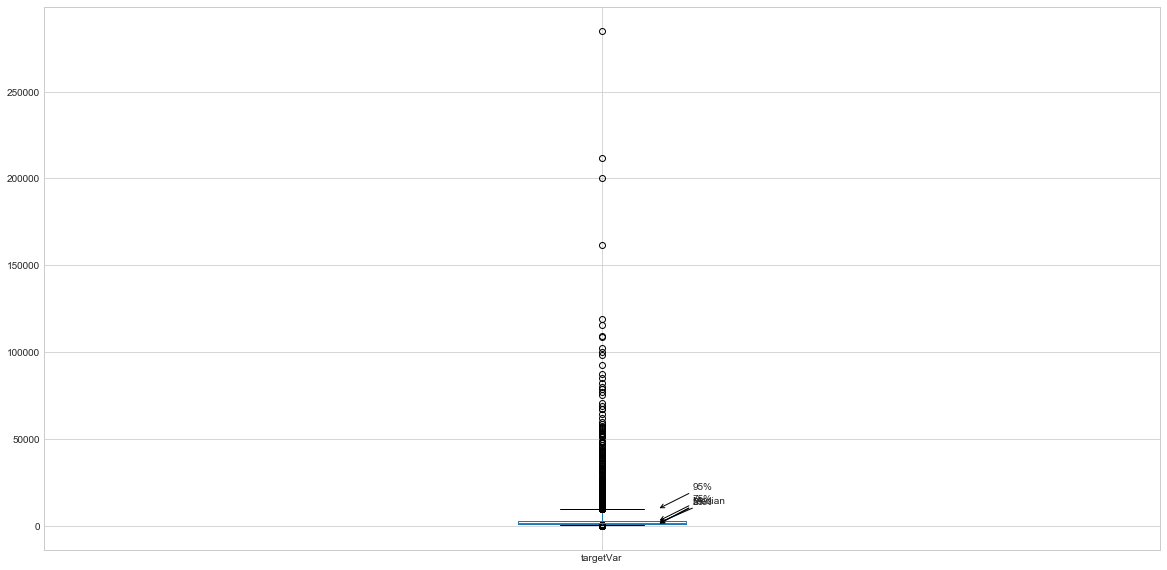

In [27]:
bpdict = df[['targetVar']].boxplot(whis=[5, 95], return_type='dict')
annotate_boxplot(bpdict, x_loc=0)

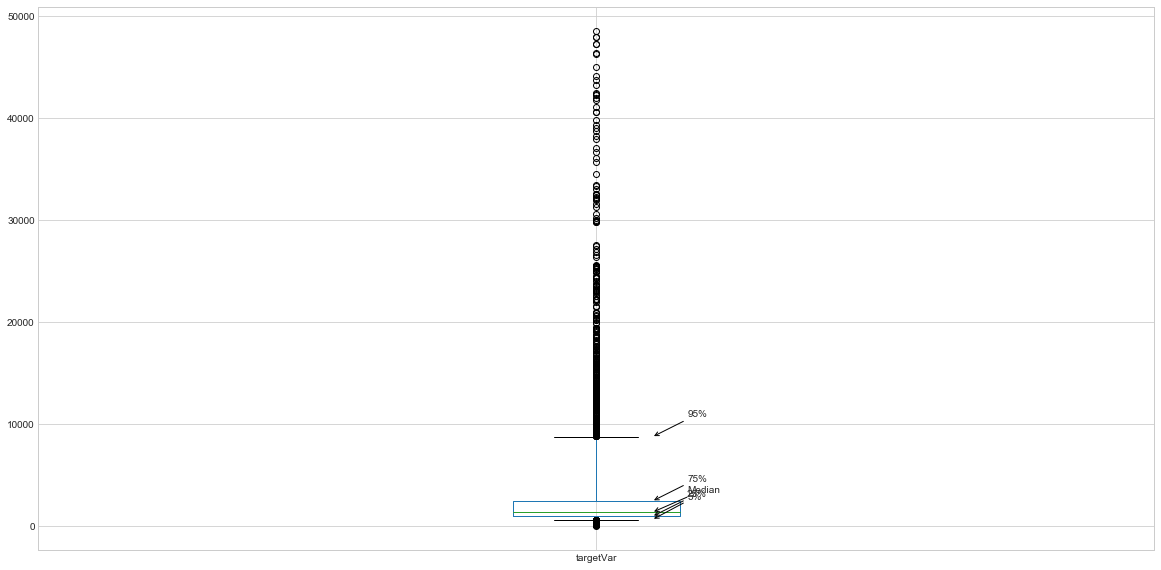

In [28]:
bpdict = df[df.targetVar<=50000][['targetVar']].boxplot(whis=[5, 95], return_type='dict')
annotate_boxplot(bpdict, x_loc=0)

In [29]:
#95th percentile
np.percentile(df['targetVar'], 95)

9500.0

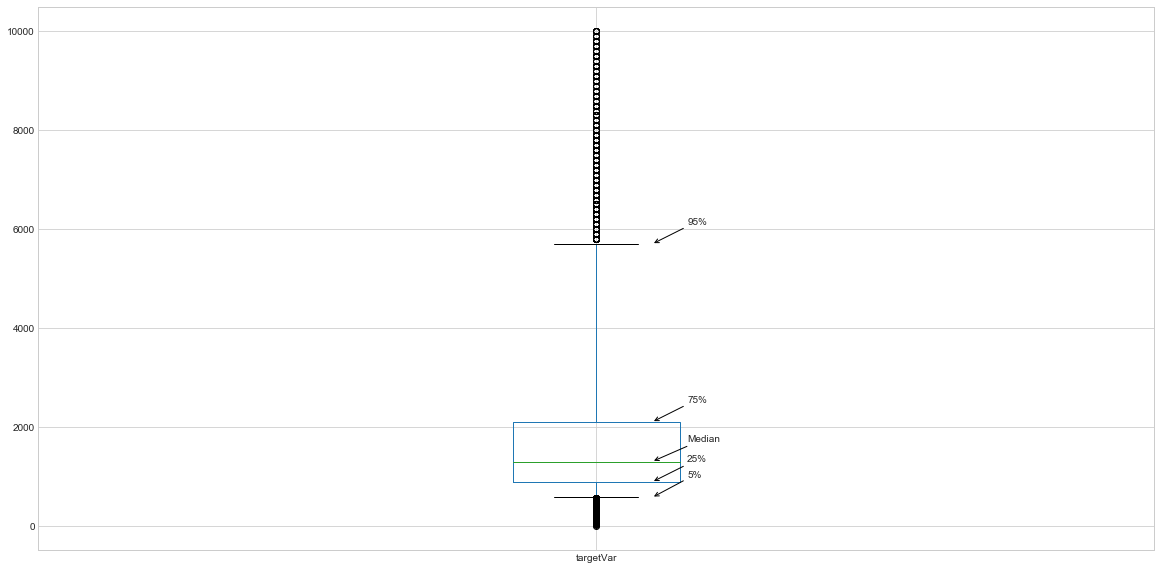

In [30]:
bpdict = df[df.targetVar<=10000][['targetVar']].boxplot(whis=[5, 95], return_type='dict')
annotate_boxplot(bpdict, x_loc=0)